# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [66]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9aba8f52f775591a856db4c786f81bb8&units=imperial&q=


In [35]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | excelsior springs
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | shingu
Processing Record 4 of Set 1 | canico
Processing Record 5 of Set 1 | cozumel
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | talnakh
City not found. Skipping...
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | porto belo
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | hamilton
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | rudnya
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | carauari
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | atuona
Processing Record 23

City not found. Skipping...
Processing Record 42 of Set 4 | dawei
Processing Record 43 of Set 4 | pangnirtung
City not found. Skipping...
Processing Record 44 of Set 4 | gat
City not found. Skipping...
Processing Record 45 of Set 4 | keetmanshoop
Processing Record 46 of Set 4 | langham
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | lafiagi
Processing Record 49 of Set 4 | kavaratti
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | nanyang
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | sur
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | xining
Processing Record 8 of Set 5 | hongjiang
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | fairbanks
Processing Record 11 of Set 5 | santa maria
Processing Record 12 of Set 5 | nizhniy odes
Processing Record 13 of Set 5 | kurchum
Processing Record 14 of Set 5 | sioux lookout
Processing Record

Processing Record 32 of Set 8 | victoria
Processing Record 33 of Set 8 | kruisfontein
Processing Record 34 of Set 8 | santa rita
Processing Record 35 of Set 8 | almaznyy
Processing Record 36 of Set 8 | tiksi
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | maputo
City not found. Skipping...
Processing Record 39 of Set 8 | sidi ali
Processing Record 40 of Set 8 | salinas
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | lazaro cardenas
Processing Record 43 of Set 8 | tulum
Processing Record 44 of Set 8 | formoso do araguaia
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | okha
Processing Record 47 of Set 8 | mujiayingzi
Processing Record 48 of Set 8 | verkhnevilyuysk
Processing Record 49 of Set 8 | paraiso
Processing Record 1 of Set 9 | jashpurnagar
Processing Record 2 of Set 9 | casas grandes
Processing Record 3 of Set 9 | katherine
Processing Record 4 of Set 9 | dakoro
City not found. Skipping...
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [39]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,excelsior springs,75,US,1586643590,23,44.90,-93.57,61.00,3.36
1,new norfolk,25,LR,1586643591,84,6.65,-10.59,78.64,3.29
2,shingu,100,JP,1586643591,63,33.73,135.98,50.92,6.67
3,canico,75,PT,1586643591,72,32.63,-16.85,62.60,13.87
4,cozumel,40,MX,1586643591,62,20.51,-86.95,86.00,12.75
5,hermanus,100,ZA,1586643300,67,-34.42,19.23,70.00,18.01
6,talnakh,75,RU,1586643581,80,69.49,88.40,35.60,31.32
7,tuktoyaktuk,20,CA,1586643592,84,69.45,-133.04,3.20,6.93
8,lebu,0,CL,1586643495,55,-37.62,-73.65,57.85,16.91
9,ushuaia,40,AR,1586643552,80,-54.80,-68.30,41.00,23.04


In [40]:
weather_dataframe.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

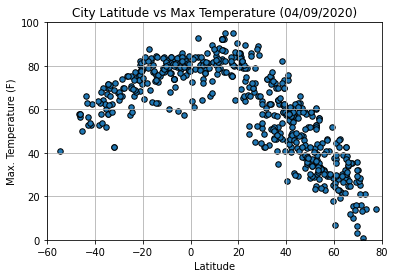

In [41]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature (04/09/2020)")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

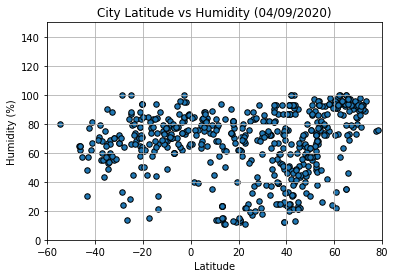

In [42]:
#Create a Scatter Plot for Lattitude vs Humidity of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity (04/09/2020)")

plt.ylim(0,150)
plt.xlim(-60, 80)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS HUM.png")

#### Latitude vs. Cloudiness Plot

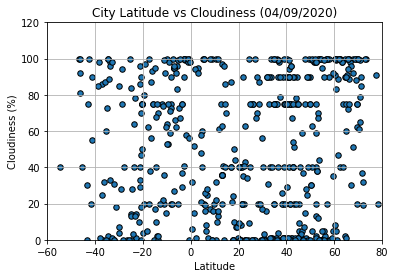

In [43]:
#Create a Scatter Plot for Lattitude vs Cloudiness of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness (04/09/2020)")

plt.ylim(0,120)
plt.xlim(-60, 80)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS cloudiness.png")

#### Latitude vs. Wind Speed Plot

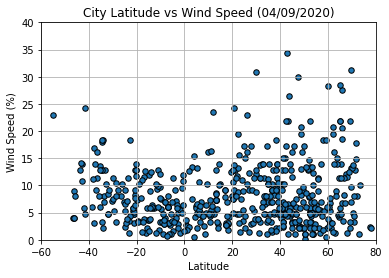

In [44]:
#Create a Scatter Plot for Lattitude vs Wind Speed of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed (04/09/2020)")

plt.ylim(0,40)
plt.xlim(-60, 80)

plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS Wind Speed.png")

## Linear Regression

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots


In [46]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_dataframe.loc[weather_dataframe['Lat'] > 0, :]
southern_hemisphere_df = weather_dataframe.loc[weather_dataframe['Lat'] < 0, :]
northern_hemisphere_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,excelsior springs,75,US,1586643590,23,44.90,-93.57,61.00,3.36
1,new norfolk,25,LR,1586643591,84,6.65,-10.59,78.64,3.29
2,shingu,100,JP,1586643591,63,33.73,135.98,50.92,6.67
3,canico,75,PT,1586643591,72,32.63,-16.85,62.60,13.87
4,cozumel,40,MX,1586643591,62,20.51,-86.95,86.00,12.75
...,...,...,...,...,...,...,...,...,...
545,aksu,99,CN,1586643724,20,41.12,80.26,57.85,2.48
546,lavrentiya,94,RU,1586643086,98,65.58,-171.00,31.35,11.30
547,krasnoselkup,100,RU,1586643084,97,65.70,82.47,35.76,20.56
548,berbera,22,SO,1586643726,76,10.44,45.01,82.74,4.79


In [48]:
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,hermanus,100,ZA,1586643300,67,-34.42,19.23,70.00,18.01
8,lebu,0,CL,1586643495,55,-37.62,-73.65,57.85,16.91
9,ushuaia,40,AR,1586643552,80,-54.80,-68.30,41.00,23.04
14,kaitangata,92,NZ,1586643420,62,-46.28,169.85,56.61,8.95
16,bluff,100,NZ,1586643065,65,-46.60,168.33,57.99,4.00
...,...,...,...,...,...,...,...,...,...
536,boende,98,CD,1586643561,66,-0.22,20.87,77.50,1.63
538,opuwo,5,NA,1586643722,45,-18.06,13.84,72.28,7.74
540,ewa beach,59,ID,1586643723,71,-8.62,122.51,76.50,3.60
542,cockburn town,0,AU,1586643445,70,-32.08,141.00,42.80,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8739436817812086


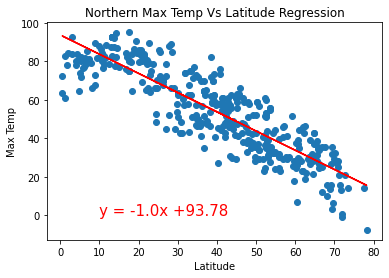

In [49]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'NorthernMaxTempVsLatitudeReg.png', (10,0)) 

In [50]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7327212943575446


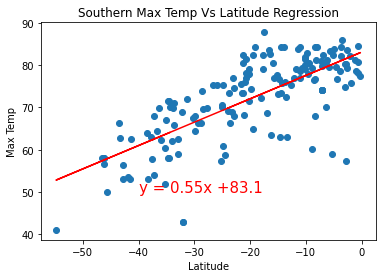

In [51]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'SouthernMaxTempVsLatitudeReg.png', (-40,50)) 

In [52]:
# This linear regression shows that the Max Temperature generally decreases as the latitude goes further away from the equator, which supports our hypothesis for the Southern Hemisphere. However, the r-squared is not extremely strong for this data set. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2929045376287426


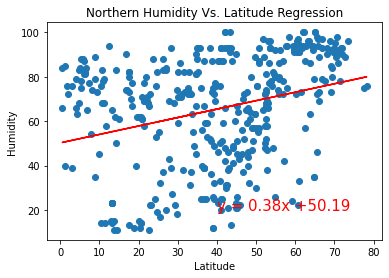

In [53]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'NorthernHumidityVsLatitudeReg.png', (40,20)) 

In [54]:
# This linear regression shows that the humidity percent generally decreases as the latitude goes further away from the equator, but the r-squared is not very high for this making it difficult to determine if the data accurately portrays this or not. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2899637283110326


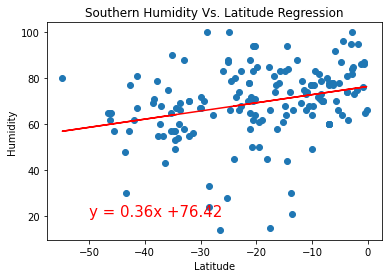

In [55]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'SouthernHumidityVsLatitudeReg.png', (-50,20)) 

In [56]:
# This linear regression suggests that the humidity percent increases as we get closer to the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2415673894080067


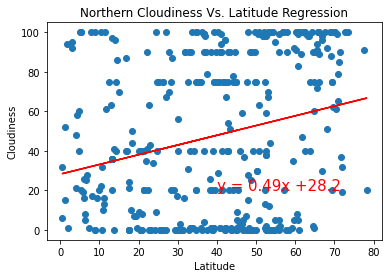

In [57]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'NorthernCloudinessVsLatitudeReg.png', (40,20)) 

In [58]:
# This linear regression suggests that the cloudiness percent increases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22189803984046785


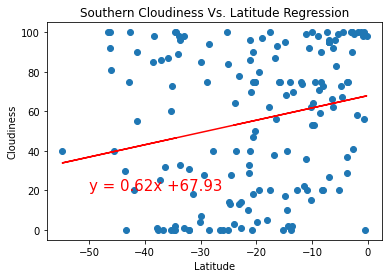

In [59]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'SouthernCloudinessVsLatitudeReg.png', (-50,20)) 

In [60]:
# This linear regression suggests that the cloudiness percent decreases as we get further from the equator, but this is probably not exactly the case since the r-squared is not strong. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11561702260466337


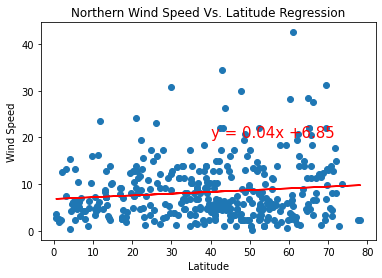

In [61]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'NorthernWindSpeedVsLatitudeReg.png', (40,20)) 

In [62]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.42448765969621327


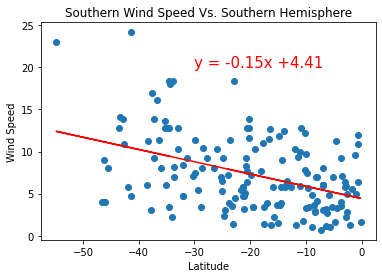

In [63]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'SouthernWindSpeedVsLatitudeReg.png', (-30,20)) 

In [64]:
# This linear regression suggests that the wind speed slightly increases as we get further from the equator, but this is likely not exactly the case since the r-squared is not strong. 